In [1]:
#Importamos librerias
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
#Cargamos listado de empresas
sp500_empresas = pd.read_csv('Empresas_SP500_con_marketcap.csv')

In [3]:
#Filtramos las empresas seleccionadas.
lista = ['APD','LIN','MLM']
empresas_analizadas = sp500_empresas[sp500_empresas['Symbol'].isin(lista)]
empresas_analizadas

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization,Current stock value
13,APD,Air Products and Chemicals,Materials,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940,6.169466e+10,280.98
288,LIN,Linde plc,Materials,Industrial Gases,"Guildford, United Kingdom",1992-07-01,1707925,1879,1.640474e+11,347.66
302,MLM,Martin Marietta Materials,Materials,Construction Materials,"Raleigh, North Carolina",2014-07-02,916076,1993,2.237190e+10,362.08


In [4]:
#Exportamos a csv
empresas_analizadas.to_csv('Datos_empresas.csv',index=False)

In [7]:
#Definimos función para importar csv
def leerCSVdeIndices (simbolo:str):
    try:
        df = pd.read_csv(simbolo+'.csv',index_col=0)
    except:
        try:
            df = pd.read_csv('Sectores/'+simbolo+'.csv',index_col=0)
        except:
            df = pd.read_csv('Empresas/'+simbolo+'.csv',index_col=0)
    df.index = pd.to_datetime(df.index)
    return df

In [8]:
#Importamos datos de las empresas seleccionadas.
apd = leerCSVdeIndices('APD')
lin = leerCSVdeIndices('LIN')
mlm = leerCSVdeIndices('MLM')

In [21]:
#Obtenemos la media móvil a 100 días
apd_tendencia = apd['Close'].rolling(window=(100),center=True).mean()
apd_tendencia.dropna(inplace=True)
apd_tendencia.head()

Date
2000-05-04    16.798745
2000-05-05    16.820408
2000-05-08    16.844074
2000-05-09    16.866695
2000-05-10    16.892057
Name: Close, dtype: float64

<Axes: xlabel='Date', ylabel='Close'>

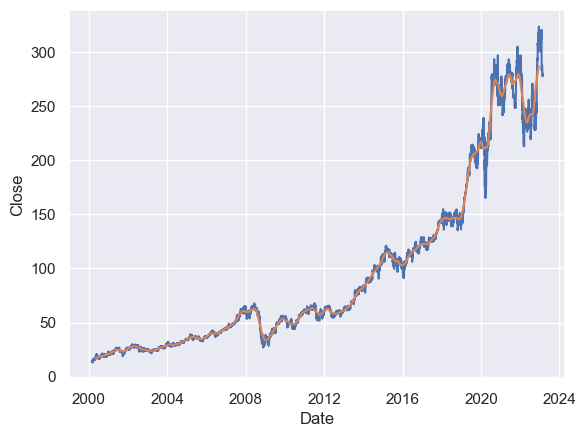

In [22]:
sns.lineplot(data=apd,x=apd.index,y='Close')
sns.lineplot(data=apd_tendencia,x=apd_tendencia.index,y=apd_tendencia.values)